# Show some basics and options for the retrieval
This notebooks reads a sample spectra and illustrates the retrieval of the PSD similar to Barret et al. (2019) and some sensitivities for the particle properties

In [1]:
from PSDretrieval import processRadar as pR
from PSDretrieval import plotting as pl
from PSDretrieval import scattering as sc
import snowScatt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load sample data (this is a window of time and height, which can define by additional input parameters)
SpecWindow  = pR.loadSpectra()
#extract a single spectra from the time-height window
SpecSingle  = pR.selectSingleTimeHeight(SpecWindow)
#load detected peaks from processed file
PeaksWindow  = pR.loadPeaks()

## plot the sample spectrum

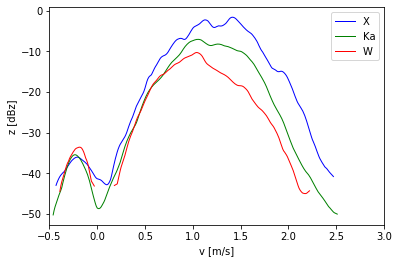

In [3]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = pl.plotObsSpectra(SpecSingle,ax)

## get the vertical wind estimate

In [4]:
#add vertical wind information to 
SpecWindow = pR.addVerticalWindToSpecWindow(SpecWindow,PeaksWindow)
#extract a single spectra from the time-height window (no with the W-information)
SpecSingle  = pR.selectSingleTimeHeight(SpecWindow)
#get again the - now shifted - single spectra from the SpecWindow 
SpecSingleWshifted  = pR.shiftSpectra(SpecSingle)

TODO: this lines should be checked with a time period with two peaks


## plot W-shifted spectrum

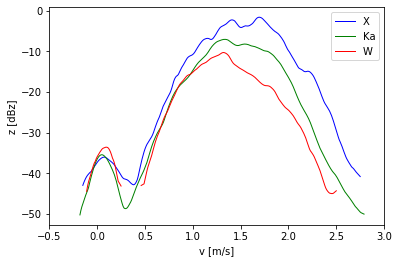

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = pl.plotObsSpectra(SpecSingleWshifted,ax)

## plot single-spectra DV vs. DWR

plot DV vs DWR for a single spectrum


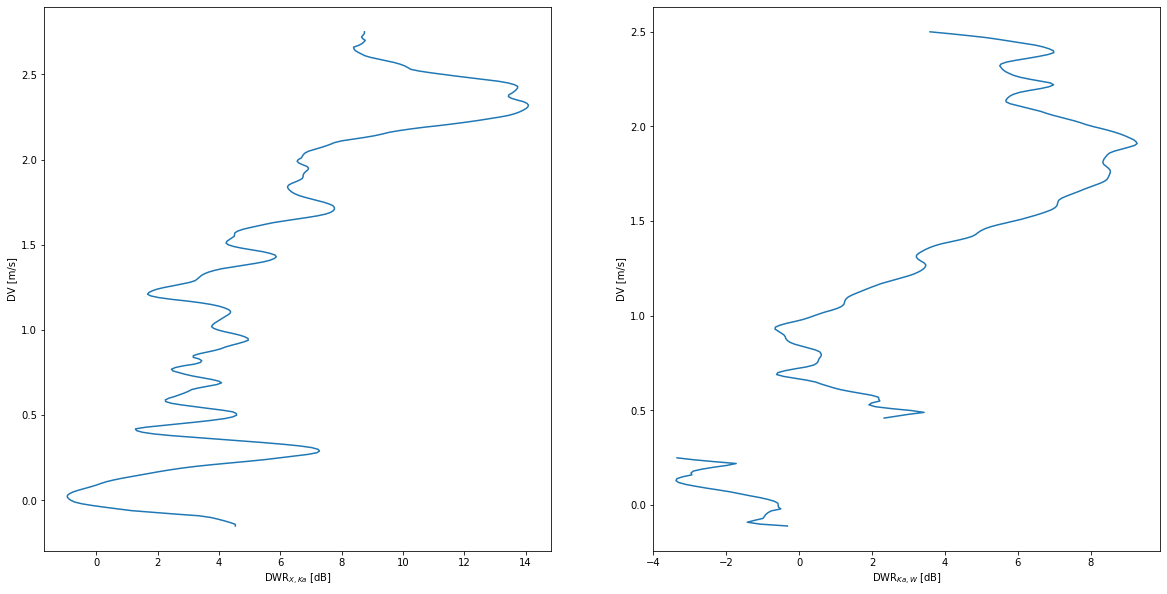

In [6]:
fig2,axes2 = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
__ = pl.plotSDWRvsDVobs(SpecSingleWshifted,axes2)

## plot average DV vs. DWR from time-height window

plot average DV vs DWR for a time-height window


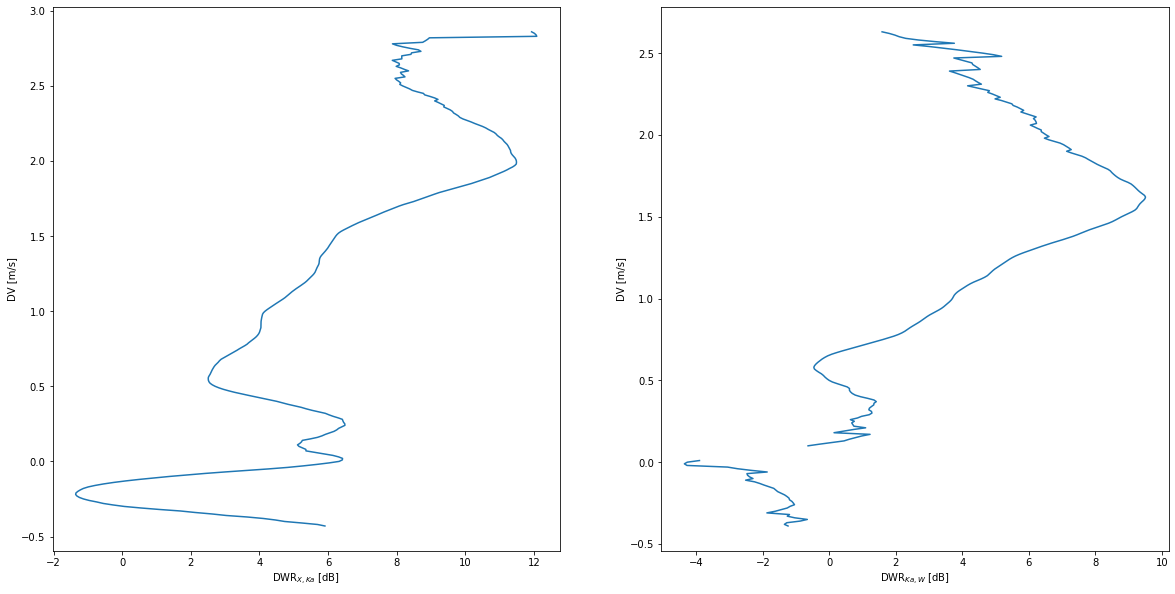

In [7]:
fig2,axes2 = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
__ = pl.plotSDWRvsDVobs(SpecWindow,axes2)

## how do the snowscatt models fit to the observed DV-DWR relation

### mixcoldend with all riming degrees

plot average DV vs DWR for a time-height window


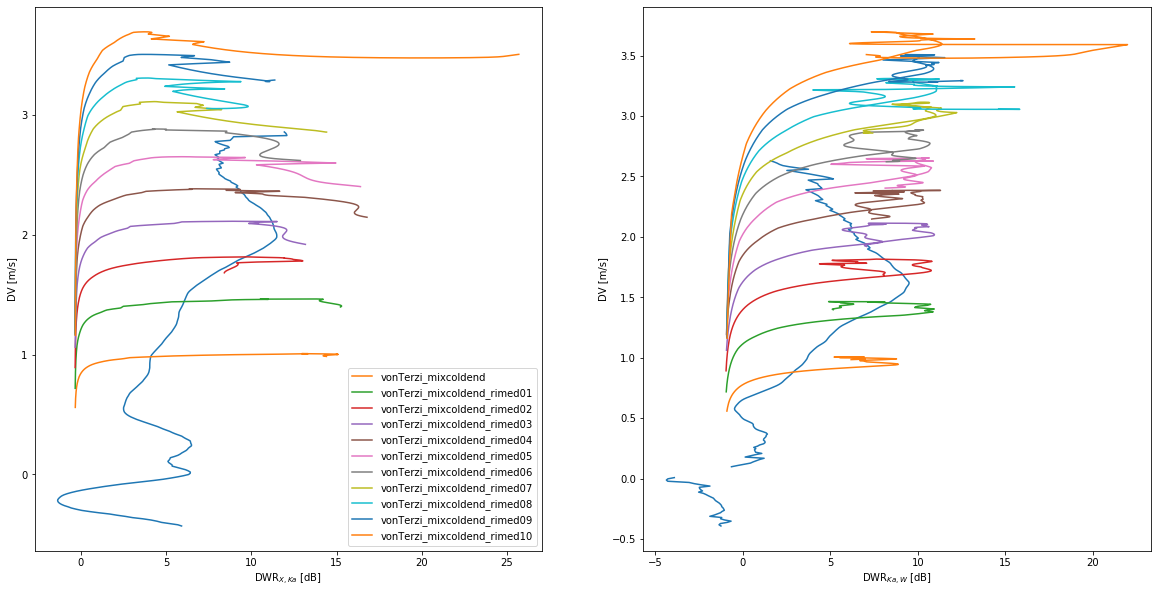

In [8]:
fig2,axes2 = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes2 = pl.plotSDWRvsDVobs(SpecWindow,axes2)
#get names of all particle types
allParticleTypes        = [*snowScatt.snowLibrary._fileList.keys()]
#select an aggregate type
aggType = 'vonTerzi_mixcoldend'
#get a list of all particle-type names from this aggregate type with different riming degrees
allRimDegr = [k for k in allParticleTypes if aggType in k]
for pType in allRimDegr:
    #get spectral-resolved particle properties
    Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(pType)
    #calculate spectral DWRs
    DWRxk = Zx-Zk; DWRkw = Zk-Zw
    axes2 = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,axes2,pType)
axes2[0].legend()

### all unrimed vonTerzis'

plot average DV vs DWR for a time-height window


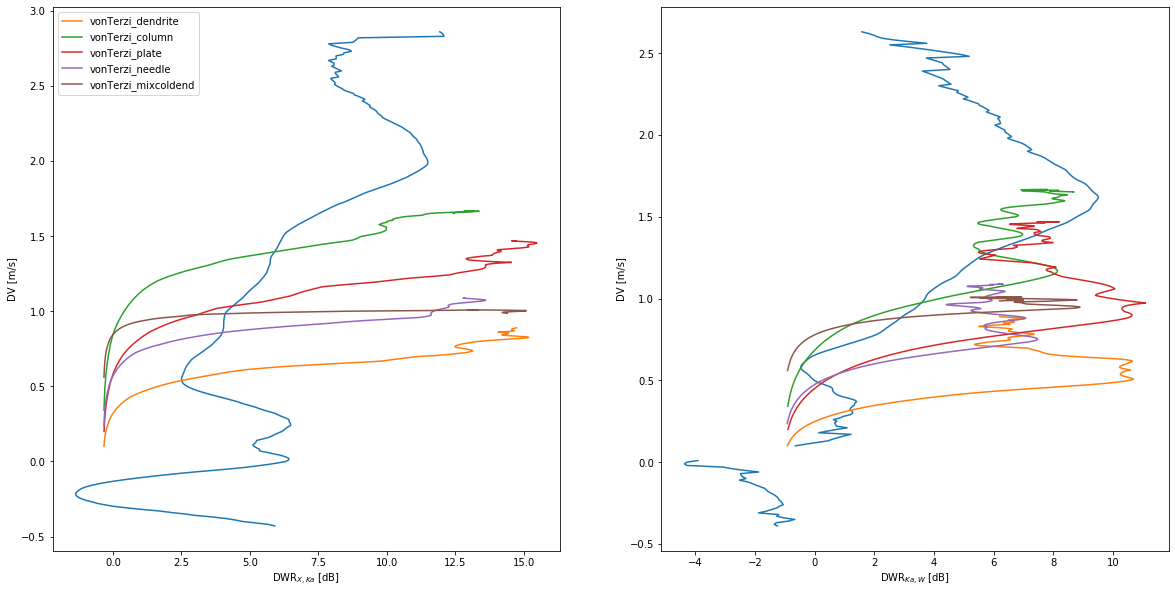

In [15]:
fig2,axes2 = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
allParticleTypes        = [*snowScatt.snowLibrary._fileList.keys()]
axes2 = pl.plotSDWRvsDVobs(SpecWindow,axes2)
allUnrimVT = [k for k in allParticleTypes if ("vonTerzi_" in k and not "rimed" in k)]
for pType in allUnrimVT:
    #get spectral-resolved particle properties
    Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(pType)
    #calculate spectral DWRs
    DWRxk = Zx-Zk; DWRkw = Zk-Zw
    axes2 = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,axes2,pType)
axes2[0].legend()

In [16]:
### all Leinonens' and Ori

plot average DV vs DWR for a time-height window


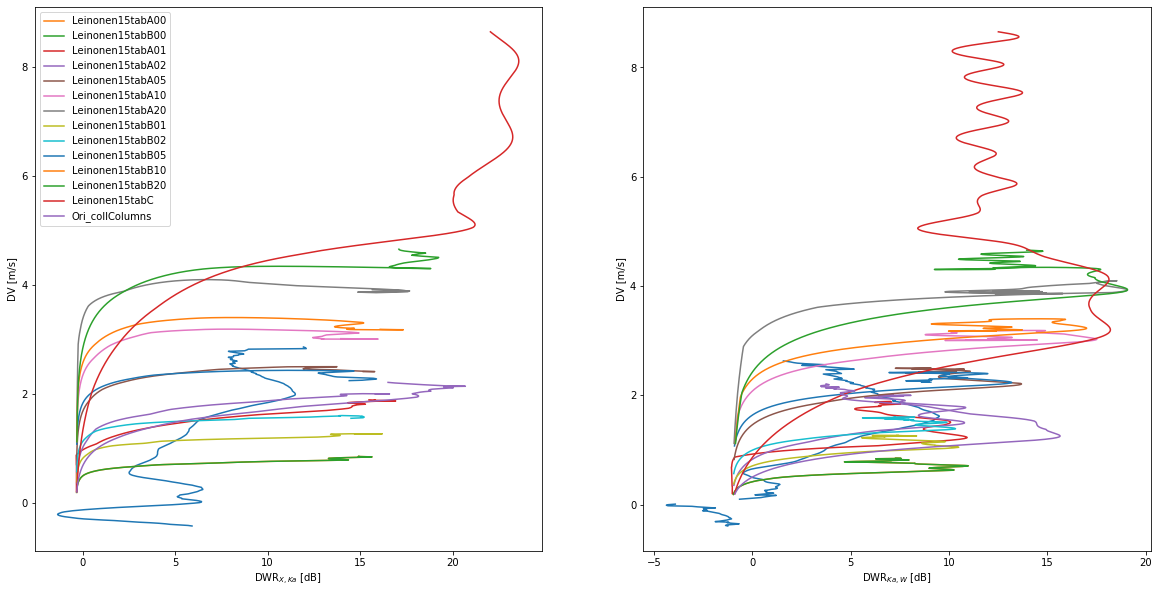

In [19]:
fig2,axes2 = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
allParticleTypes        = [*snowScatt.snowLibrary._fileList.keys()]
axes2 = pl.plotSDWRvsDVobs(SpecWindow,axes2)
allUnrimVT = [k for k in allParticleTypes if ("Leinonen" in k or "Ori" in k)]
for pType in allUnrimVT:
    #get spectral-resolved particle properties
    Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(pType)
    #calculate spectral DWRs
    DWRxk = Zx-Zk; DWRkw = Zk-Zw
    axes2 = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,axes2,pType)
axes2[0].legend()